<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт необходимых библиотек**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

**Загрузка данных**

In [3]:
sales_of_company_x = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/daily-total-female-births-in-cal.csv")

In [4]:
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


**Отображение графика**

In [5]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

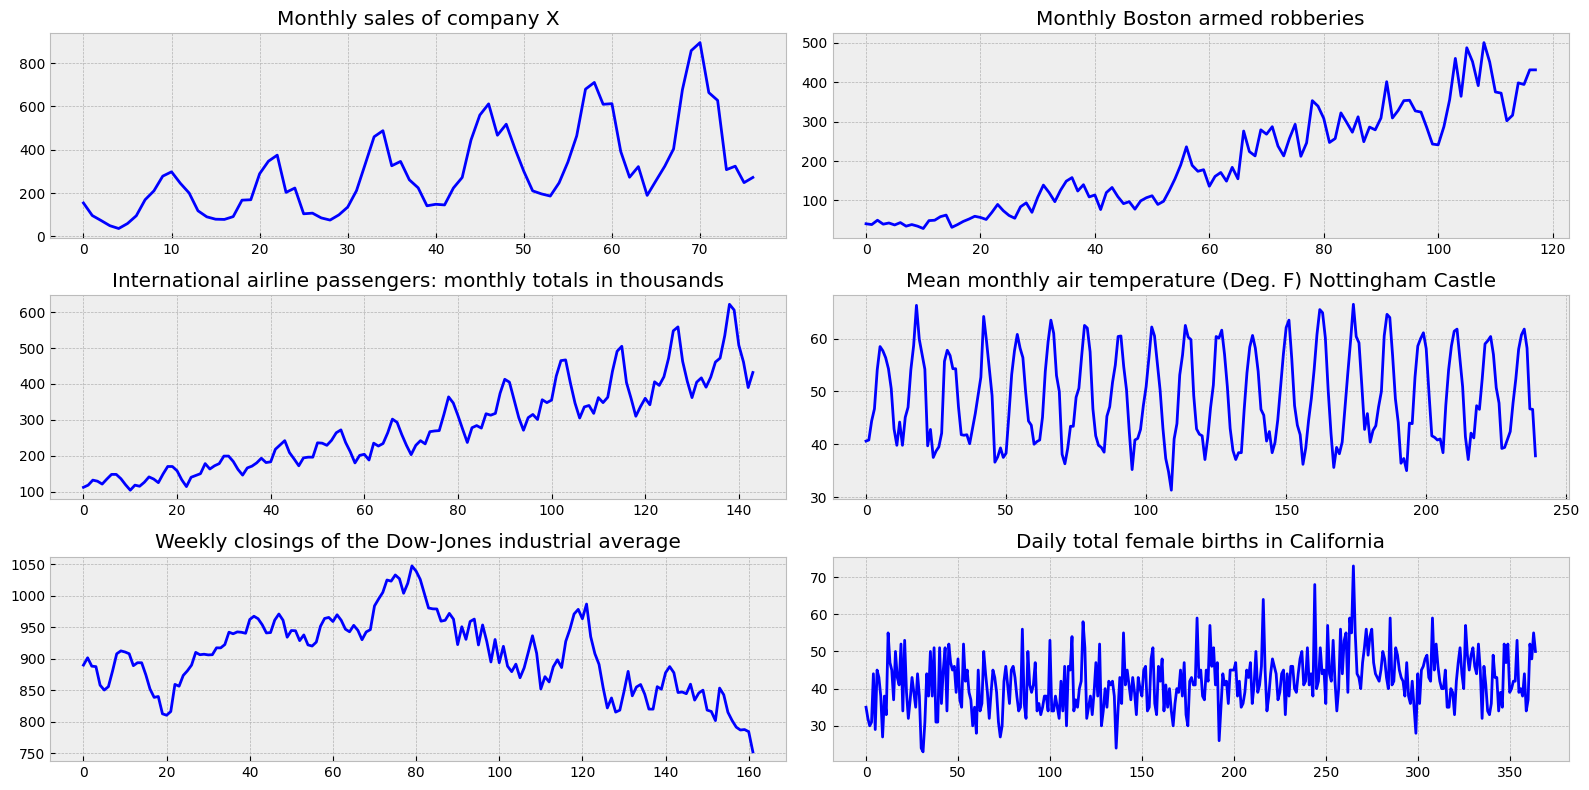

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [7]:
# Функция для проверки стационарности с помощью теста Дики-Фуллера
def test_stationarity(timeseries):
    # Определение скользящего среднего и стандартного отклонения
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Построение графиков скользящего среднего и стандартного отклонения
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Выполнение теста Дики-Фуллера
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

**"Monthly sales of company X"**

In [12]:
ts_sales_of_company_x = sales_of_company_x['Count']

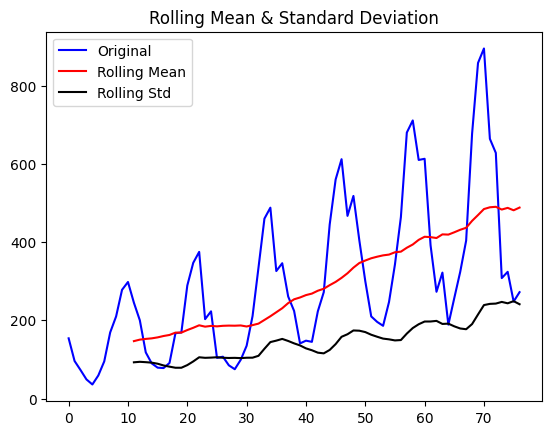

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [9]:
# Проверка стационарности исходного ряда
test_stationarity(ts_sales_of_company_x)

Видим, что значение p-value больше 0,05, поэтому применим дифференцирование

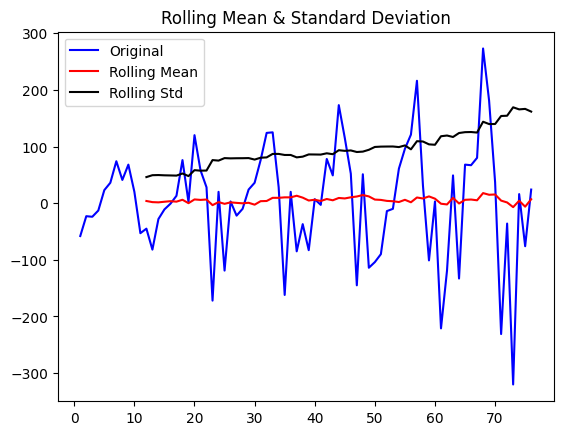

Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


In [15]:
# Применение первого дифференцирования
ts_sales_of_company_x_diff = ts_sales_of_company_x.diff().dropna()
test_stationarity(ts_sales_of_company_x_diff)

После дифференцирования значение p-value всё ещё выше 0.05. Применим второе дифференцирование

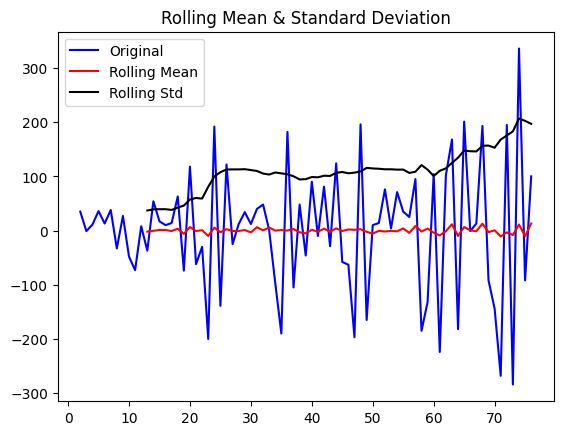

Results of Dickey-Fuller Test:
Test Statistic                -9.193734e+00
p-value                        2.089629e-15
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


In [11]:
# Применение второго дифференцирования
if adfuller(ts_sales_of_company_x_diff)[1] > 0.05:
    ts_sales_of_company_x_diff2 = ts_sales_of_company_x_diff.diff().dropna()
    test_stationarity(ts_sales_of_company_x_diff2)

Видим, что значение p-value значительно меньше 0.05, можем считать временной ряд стационарным

**"Monthly Boston armed robberies"**

In [13]:
ts_robberies_in_boston = robberies_in_boston['Count']

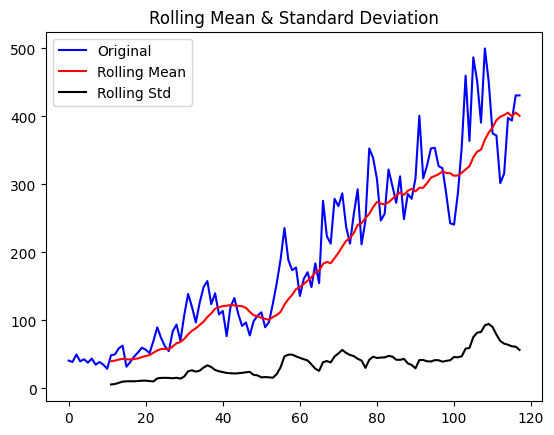

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [14]:
# Проверка стационарности исходного ряда
test_stationarity(ts_robberies_in_boston)

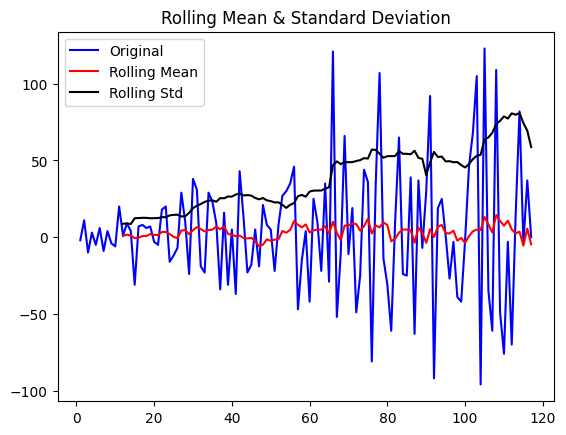

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


In [16]:
# Применение первого дифференцирования
ts_robberies_in_boston_diff = ts_robberies_in_boston.diff().dropna()
test_stationarity(ts_robberies_in_boston_diff)

Для данного временного ряда хватило одного дифференцирования, чтобы сделать его стационарным

**"International airline passengers: monthly totals in thousands"**

In [17]:
ts_airlines_passengers = airlines_passengers['Count']

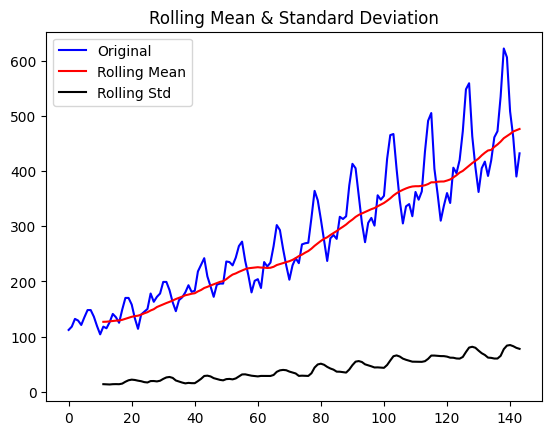

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
# Проверка стационарности исходного ряда
test_stationarity(ts_airlines_passengers)

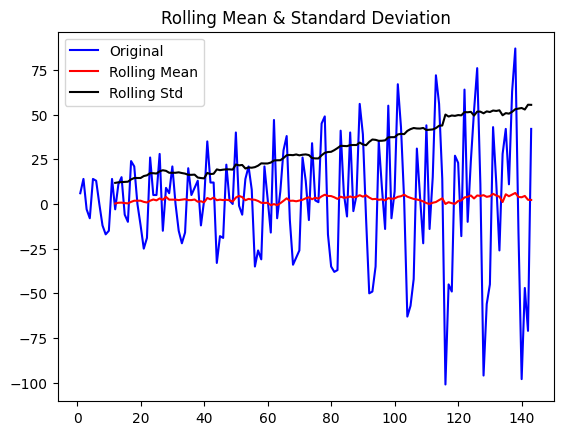

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
# Применение первого дифференцирования
ts_airlines_passengers_diff = ts_airlines_passengers.diff().dropna()
test_stationarity(ts_airlines_passengers_diff)

Видим, что значение p-value больше 0,05. Визуально осталась сезонность, попробуем убрать её

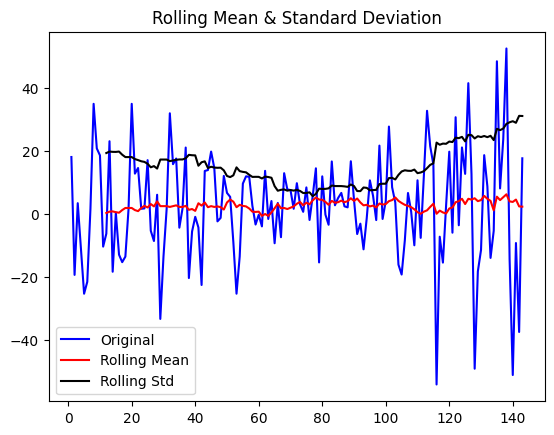

Results of Dickey-Fuller Test:
Test Statistic                  -3.188901
p-value                          0.020636
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [22]:
# Удаление сезонности
decomposition = seasonal_decompose(ts_airlines_passengers_diff, model='additive', period=12)
ts_airlines_passengers_diff_seasonal_adjusted = ts_airlines_passengers_diff - decomposition.seasonal
test_stationarity(ts_airlines_passengers_diff_seasonal_adjusted)

Видим, что удаление сезонности помогло и теперь временной ряд является стационарным

**"Mean monthly air temperature (Deg. F) Nottingham Castle"**

In [32]:
ts_mean_monthly_temp = mean_monthly_temp['Deg'].dropna()

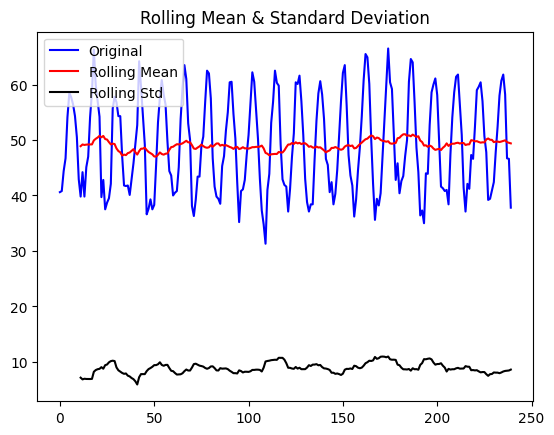

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


In [33]:
# Проверка стационарности исходного ряда
test_stationarity(ts_mean_monthly_temp)

Для данного временного ряда будет достаточно устранить сезонность

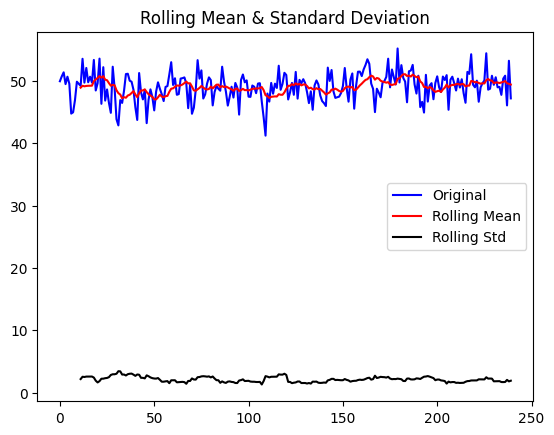

Results of Dickey-Fuller Test:
Test Statistic                -8.505817e+00
p-value                        1.203773e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


In [35]:
# Удаление сезонности
decomposition1 = seasonal_decompose(ts_mean_monthly_temp, model='additive', period=12)
ts_mean_monthly_temp_diff_seasonal_adjusted = ts_mean_monthly_temp - decomposition1.seasonal
test_stationarity(ts_mean_monthly_temp_diff_seasonal_adjusted)

Данное решение помогло и временной ряд теперь стационарный

**"Weekly closings of the Dow-Jones industrial average"**

In [42]:
ts_dowjones_closing = dowjones_closing['Close'].dropna()

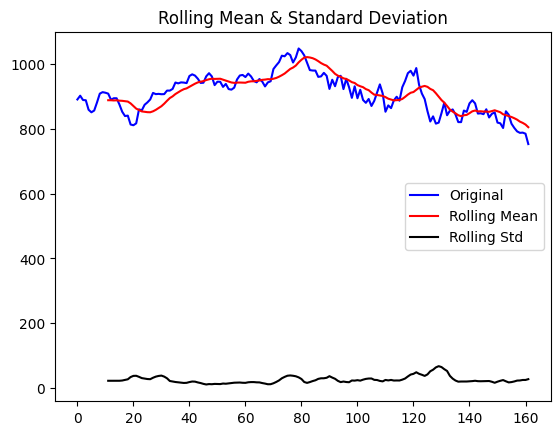

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


In [38]:
# Проверка стационарности исходного ряда
test_stationarity(ts_dowjones_closing)

Попробуем выпрямить график при помощи логарифмирования

In [39]:
# Логарифмирование исходного временного ряда
ts_dowjones_closing_log = np.log(ts_dowjones_closing)
ts_dowjones_closing_log = ts_dowjones_closing_log.replace([np.inf, -np.inf], np.nan).dropna()  # Удаление бесконечных значений и NaN


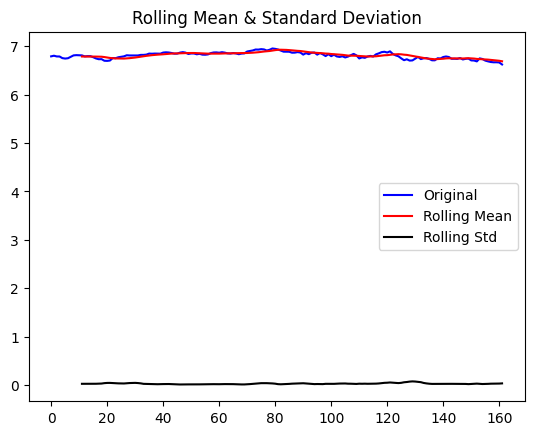

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


In [40]:
# Проверка стационарности логарифмированного ряда
test_stationarity(ts_dowjones_closing_log)

А теперь применим дифференцирование к полученному временному ряду

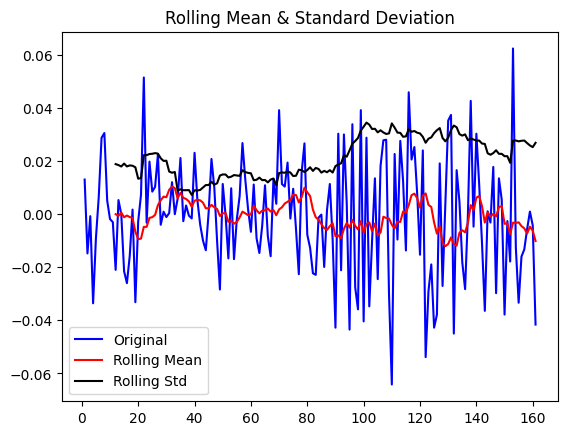

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


In [41]:
# Применение первого дифференцирования к логарифмированному ряду
ts_dowjones_closing_log_diff1 = ts_dowjones_closing_log.diff().dropna()
test_stationarity(ts_dowjones_closing_log_diff1)

Теперь данный временной ряд является стационарным

**"Daily total female births in California"**

In [43]:
ts_female_births = female_births['Count'].dropna()

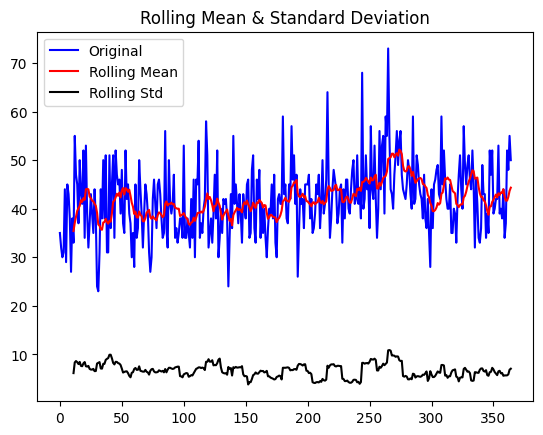

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


In [44]:
# Проверка стационарности исходного ряда
test_stationarity(ts_female_births)

Видим, что данный временной ряд уже является стационарным и над ним нет необходимости проводить какие-либо операции.

**Выводы**

Были проанализированы шесть временных рядов, один из них уже являлся стационарным, поэтому к нему не применялись никакие методы.

Были применены различные методы для придания временному ряду стационарности:
 - Дифференцирование (иногда двойное)
 - Логарифмирование
 - Удаление сезонности

Все временные ряды удалось привести к стационарности различными методами за один или несколько шагов.